# Krypton XY Lifetime maps

## Produce XY lifetime maps 

### Author: GML, JAH, JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [75]:
%load_ext autoreload
%autoreload 2
import os
import time
import datetime 
print("Last updated on ", time.asctime())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Last updated on  Fri Aug 31 13:10:31 2018


### Input files

In [2]:
from krcal.core.kr_types import KrFileName
input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
map_path    = f"$IC_DATA/maps"

input_file_names  = ['dst_6206_0000_9999.h5','dst_6206_10000_19999.h5',
                    'dst_6206_20000_29999.h5','dst_6206_30000_39299.h5']
output_file_name  = ' '
map_file_name     = 'kr_maps_xy_6206.h5'
map_file_name_ts  = 'kr_maps_xy_ts_6206.h5'
emap_file_name    = ' '



krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_file_name)

### Notebook configuration

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [5]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units

In [6]:
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts

In [7]:
from krcal.core.histo_functions    import h1, h1d, h2, h2d, plot_histo

In [8]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import NN
from krcal.core                     import fit_functions_ic as fitf

In [9]:
from krcal.core.stat_functions      import mean_and_std

In [10]:
from krcal.core.analysis_functions  import kr_ranges_and_bins
from krcal.core.analysis_functions  import fiducial_volumes
from krcal.core.analysis_functions  import fid_eff
from krcal.core.analysis_functions  import select_rphi_sectors
from krcal.core.analysis_functions  import select_xy_sectors
from krcal.core.analysis_functions  import event_map
from krcal.core.analysis_functions  import plot_sector
from krcal.core.analysis_functions  import plot_sectors
from krcal.core.analysis_functions  import kr_event_selection
from krcal.core.analysis_functions  import kr_event

In [11]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_functions    import print_fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map
from krcal.core.fit_lt_functions    import fit_map_xy

In [12]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy

In [13]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName


In [14]:
from krcal.core.map_functions   import draw_wedges
from krcal.core.map_functions   import define_rphi_sectors
from krcal.core.map_functions   import rphi_sector_alpha_map
from krcal.core.map_functions   import rphi_sector_map
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import draw_maps
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import draw_xy_maps
from krcal.core.map_functions   import draw_xy_map
from krcal.core.map_functions   import draw_xy_maps_ts
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [15]:
import krcal.dev.corrections       as corrections 


In [16]:
from numpy import pi, sqrt

In [17]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [18]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Input/output 

In [19]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [20]:
fn

KrFileName(input_file_names=['/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6206_0000_9999.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6206_10000_19999.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6206_20000_29999.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6206_30000_39299.h5'], output_file_name='/Users/jjgomezcadenas/Projects/ICDATA/ldst/ ', map_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_6206.h5', map_file_name_ts='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_ts_6206.h5', emap_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/ ')

In [21]:
dst           = load_dsts(fn.input_file_names, "DST", "Events")

In [22]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {number_of_evts_full}")

Total number of events: 4085430


In [23]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [24]:
dst_time = dst.sort_values('event')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [25]:
RMAX      = 200

s1e_range = (2, 30)
s2e_range = (2000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (50,  550)
e_range = (5000, 14000)
lt_range = (1000, 5000)
c2_range = (0,3)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 100,
                                                        ynbins    = 100,
                                                        znbins    = 12,
                                                        s2enbins  = 50,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [26]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

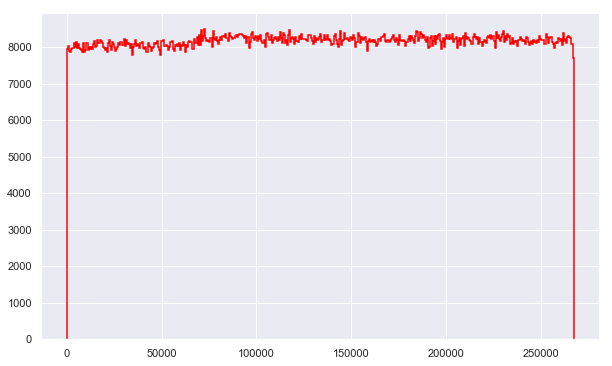

In [27]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

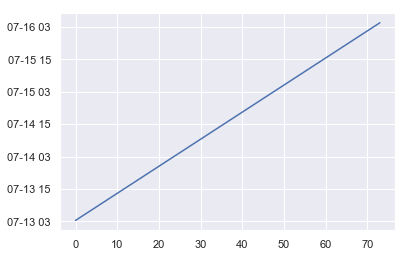

In [28]:
plt.plot(krTimes.timeStamps)

### Event distribution

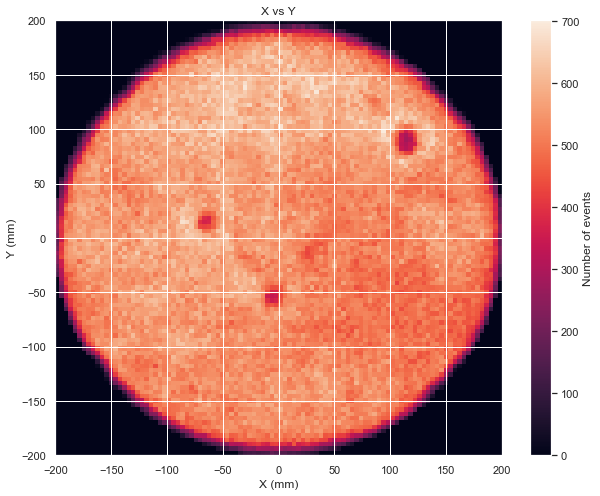

In [29]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

## Divide chamber in sectors of XY

In [30]:
t0 = time.time()
KRES = select_xy_sectors(dst,DT, dst.S2e, dst.S2q, krNbins, krBins, verbose = False)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

 KRES: t = 217.0941469669342


In [31]:
neM = event_map(KRES)

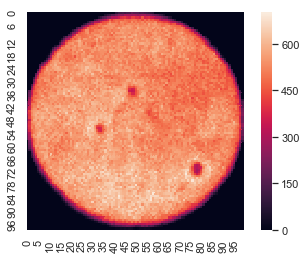

In [32]:
ax = sns.heatmap(neM, square=True)

#### Notice that binning in X-Y does not take advantage of the chamber symmetry which is obviously R-phi. Thus, many bins in the KRES map will be zero. 

## Fits in XY sectors

### Lifetime is fitted each XT seconds in the radial sectors (0 to 9) defined.

In [33]:
DT[-1] /50000

5.348874159998894

In [34]:
XT = 50000

#### For example, next cell shows a fit to cell (50,50) in the XY partition of chamber

In [76]:
fp = fit_fcs_in_xy_bin ((50,50), XT, DT, KRES, krNbins.Z, krNbins.S2e, 
                        range_z = z_range, 
                        range_e = e_range,
                        energy  = 'S2e', 
                        fit = FitType.profile)

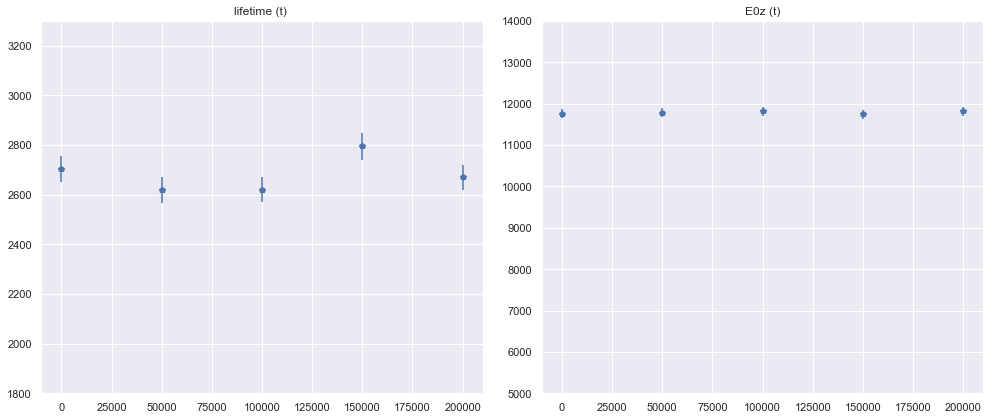

In [77]:
plot_fit_xy(fp,  range_e0 =e_range, range_lt=(1800, 3300))

In [78]:
fp = fit_fcs_in_xy_bin ((25,25), XT, DT, KRES, krNbins.Z, krNbins.S2e, 
                        range_z = z_range, 
                        range_e = e_range,
                        energy  = 'S2e', 
                        fit = FitType.profile)

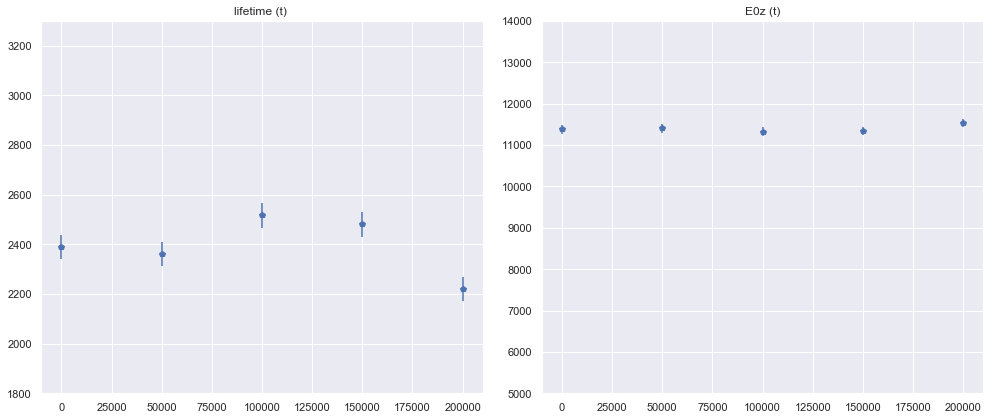

In [79]:
plot_fit_xy(fp,  range_e0 =e_range, range_lt=(1800, 3300))

## Maps

#### fit maps. The object returned is a Dict[int, List[FitParTS]] where

```
@dataclass
class FitParTS:             # Fit parameters Time Series
    ts   : np.array          # contains the time series (integers expressing time differences)
    e0   : np.array          # e0 fitted in time series
    lt   : np.array
    c2   : np.array
    e0u  : np.array          # e0 error fitted in time series
    ltu  : np.arra`
```
Thus, for each radial sector (0, 1, 2...) the function returns a list of objects, one object per phi sector (or wedge). Each object contains 6 time series; ts is time (time difference wrt to the start of the run); e0, lt... are fitted parameters to time slices.

In [39]:
t0 = time.time()
fmap = fit_map_xy(XT, DT, KRES, neM, 
                  krNbins.Z, krNbins.S2e,
                  range_z     = z_range,
                  range_e     = e_range,
                  range_chi2  = c2_range,
                  range_lt    = lt_range,
                  energy      = 'S2e', 
                  fit         = FitType.profile,
                  n_min       = 100,
                  verbose     = True,
                  nprint      = 10)
t1 = time.time()
print(f' fmap: t = {t1 -t0}')

Fitting xy bin = (0,41), with events =140
Fitting xy bin = (0,42), with events =165
Fitting xy bin = (0,43), with events =184
Fitting xy bin = (0,44), with events =228
Fitting xy bin = (0,45), with events =234
Fitting xy bin = (0,46), with events =264
Fitting xy bin = (0,47), with events =206
Fitting xy bin = (0,48), with events =184
Fitting xy bin = (0,49), with events =172
Fitting xy bin = (0,50), with events =212
 total number of zero events = 2181 
 fmap: t = 120.43088388442993


In [40]:
times = fmap[0][0].ts

In [41]:
times

[0, 50000, 100000, 150000, 200000]

#### Obtain time maps from fmap: The object returned is a SectorMapTS
```
@dataclass
class SectorMapTS:  # Map in chamber sector containing time series of pars
    chi2  : Dict[int, List[np.array]]
    e0    : Dict[int, List[np.array]]
    lt    : Dict[int, List[np.array]]
    e0u   : Dict[int, List[np.array]]
    ltu   : Dict[int, List[np.array]]
```
Here the dictionary is arranged for each of the relevant variables.

In [42]:
tsm = tsmap_from_fmap(fmap, verbose  = False)

<ErrorbarContainer object of 3 artists>

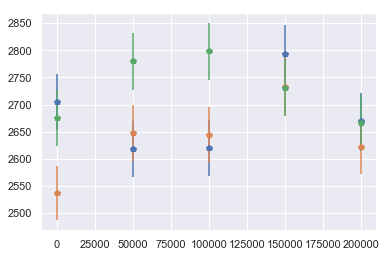

In [43]:
plt.errorbar(times, tsm.lt[50][50], np.sqrt(tsm.lt[50][50]), fmt="p")
plt.errorbar(times, tsm.lt[50][51], np.sqrt(tsm.lt[50][51]), fmt="p")
plt.errorbar(times, tsm.lt[50][52], np.sqrt(tsm.lt[50][52]), fmt="p")

<ErrorbarContainer object of 3 artists>

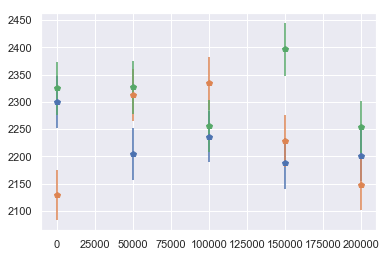

In [44]:
plt.errorbar(times, tsm.lt[60][10], np.sqrt(tsm.lt[60][10]), fmt="p")
plt.errorbar(times, tsm.lt[60][11], np.sqrt(tsm.lt[60][11]), fmt="p")
plt.errorbar(times, tsm.lt[60][12], np.sqrt(tsm.lt[60][12]), fmt="p")

### Obtain amap from tsm: The object returned is ASectorMap
```
@dataclass
class ASectorMap:  # Map in chamber sector containing average of pars
    chi2  : DataFrame
    e0    : DataFrame
    lt    : DataFrame
    e0u   : DataFrame
    ltu   : DataFrame
```
 

#### Example: map in the first time series

In [45]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [46]:
amap_average(am) 

ASectorMap(chi2=1.6729090790870351, e0=9909.926700952625, lt=1027900.4437418457, e0u=45.64317880384787, ltu=1701526511521.4595)

#### Get rid of outlayers that distort mean and error

In [47]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range, debug=True)

 set nans to average value of interval = 9500.0
 set nans to average value of interval = 3000.0
column 0
outlier found, index = 42, value =7096.781265283681
column 1
outlier found, index = 62, value =-103364.41734318045
column 3
outlier found, index = 68, value =-5452.153126636774
column 5
outlier found, index = 26, value =35944020.80696783
column 6
outlier found, index = 24, value =-1794.1776672965818
column 22
outlier found, index = 90, value =923.2720537299155
column 37
outlier found, index = 97, value =6225.211833523177
column 38
outlier found, index = 1, value =873.3193212506029
column 55
outlier found, index = 0, value =862.0666939795593
column 68
outlier found, index = 95, value =5419.783449333048
column 81
outlier found, index = 88, value =7939501695.46388
column 95
outlier found, index = 28, value =8513.955572515
column 97
outlier found, index = 33, value =5253.210292713993


In [48]:
amap_average(rmap)

ASectorMap(chi2=1.6729090790870351, e0=9909.926700952625, lt=2237.064204716517, e0u=45.64317880384787, ltu=85.76864841427009)

In [49]:
asm = relative_errors(rmap)

In [50]:
amap_average(asm)

ASectorMap(chi2=1.6729090790870351, e0=9909.926700952625, lt=2237.064204716517, e0u=0.48337200336312114, ltu=3.8508366421201754)

#### Draw the maps using default colormap

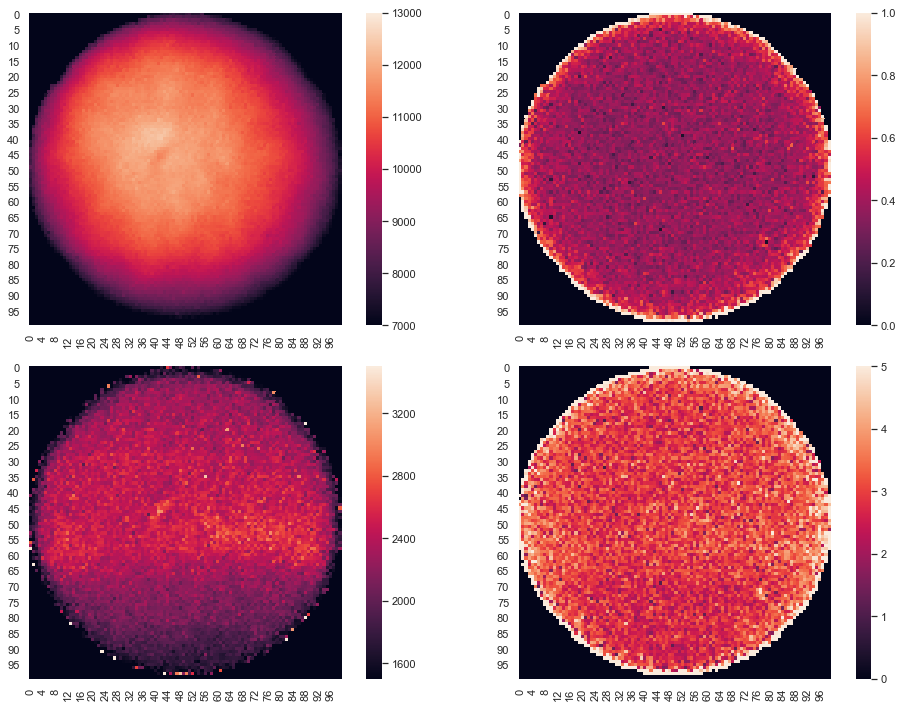

In [51]:
draw_xy_maps(asm,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Or using a specific colormap

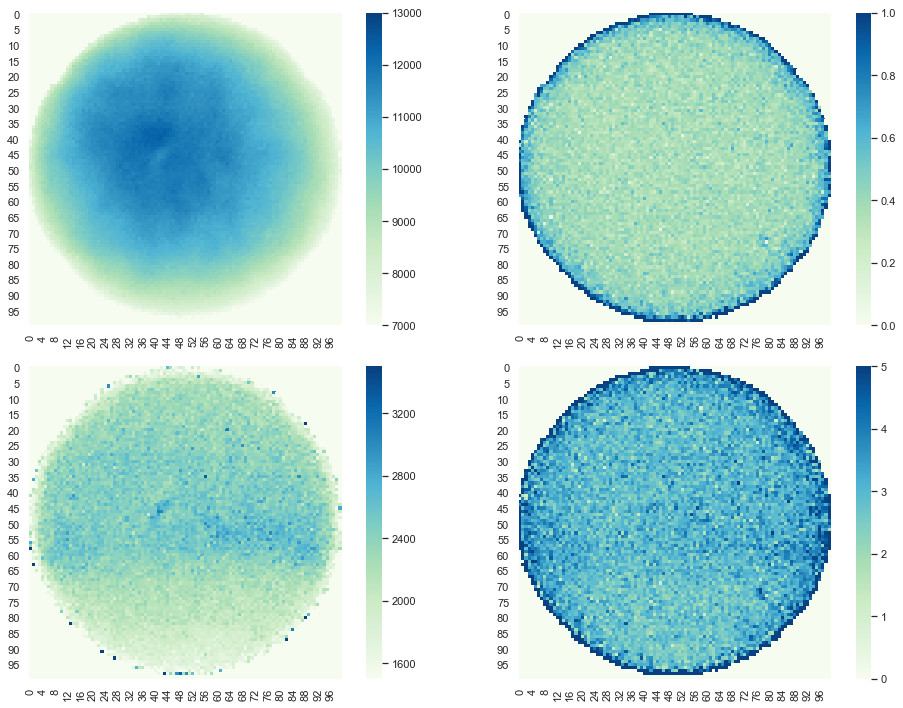

In [52]:
draw_xy_maps(asm,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))


### One can also draw a specific map

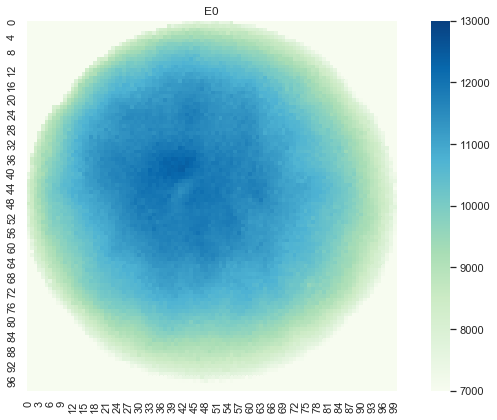

In [53]:
draw_xy_map(asm,
            wmap    = MapType.E0,
            alims   = (7000, 13000),
            cmap    = matplotlib.cm.GnBu, 
            figsize =(10,6))

## Compute the average of maps

### Get all amaps (for each time interval). Maps returned are regularized and errors relative.

In [54]:
amaps = get_maps_from_tsmap(tsm, 
                            times   = times, 
                            erange  = e_range,
                            ltrange = lt_range,
                            c2range = c2_range)


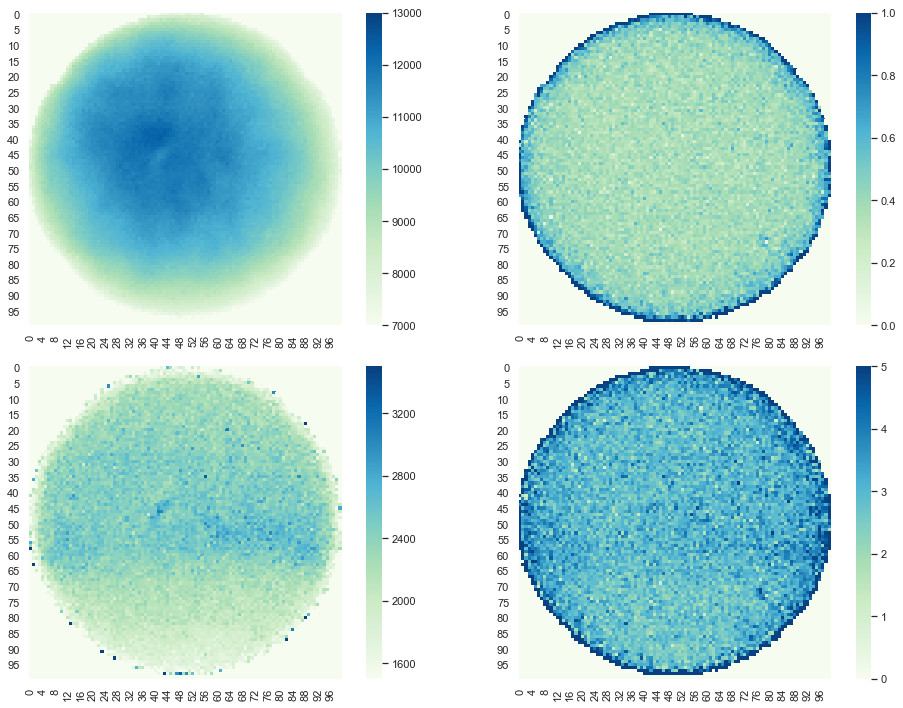

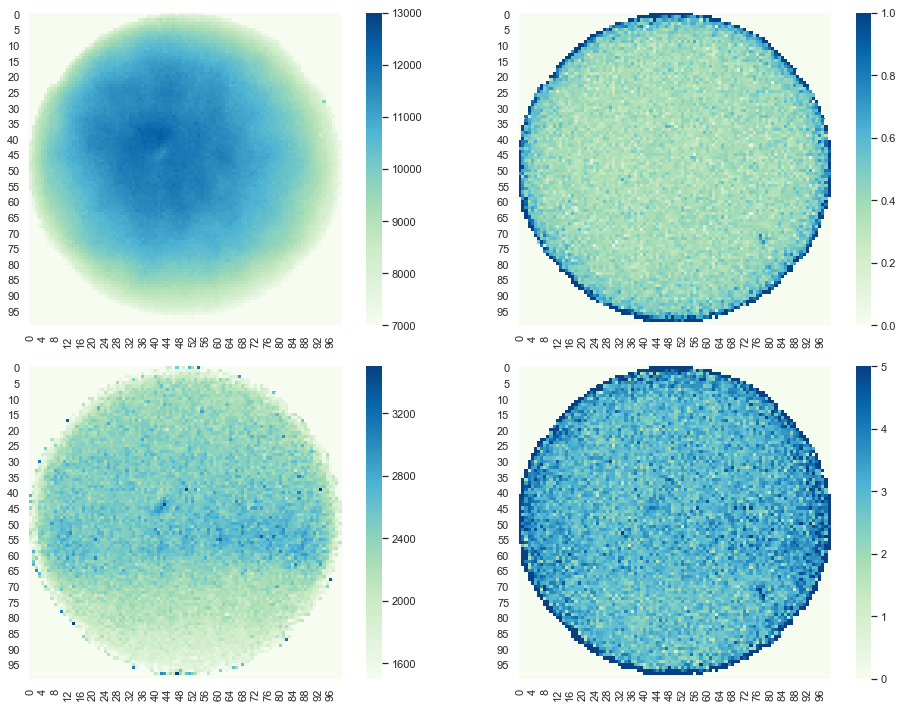

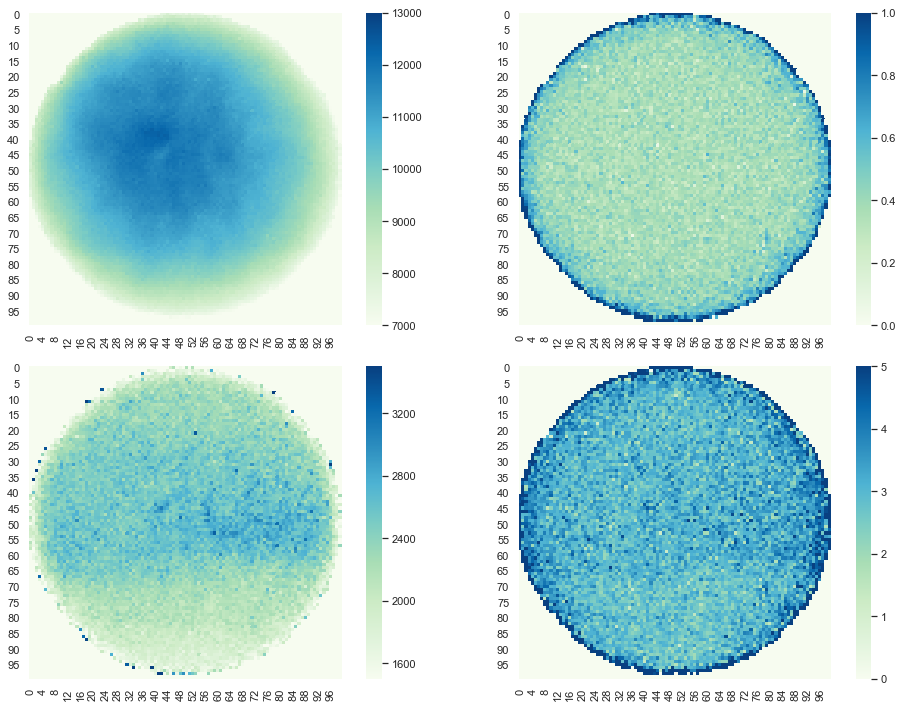

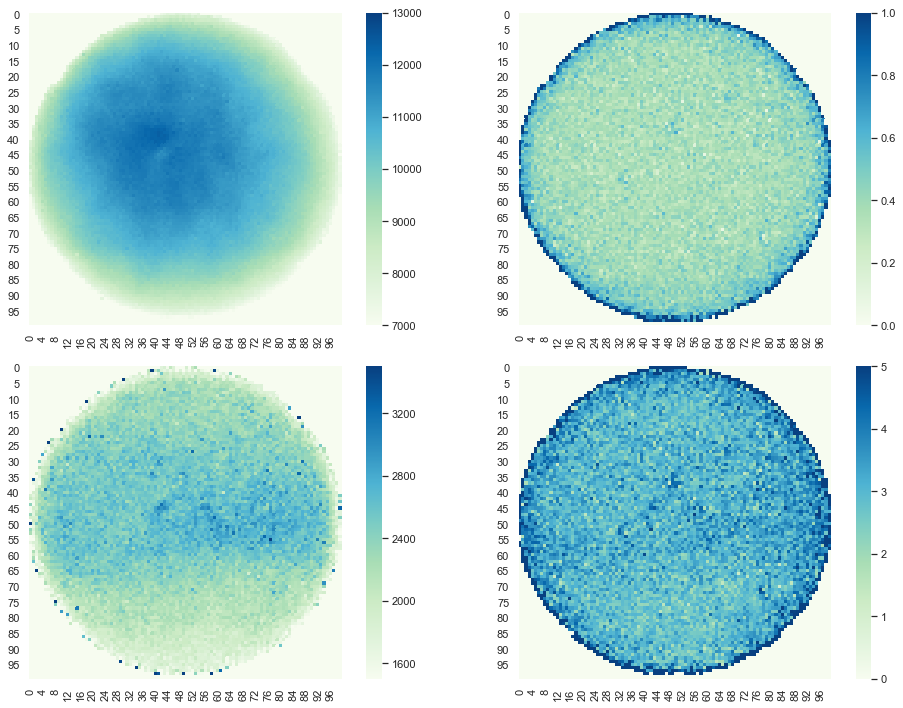

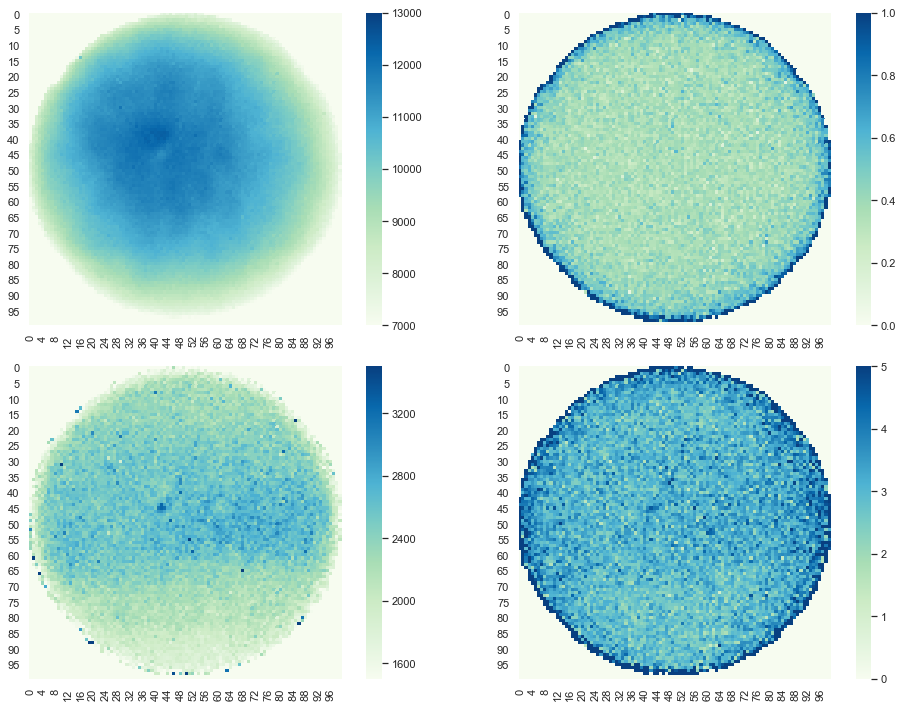

In [55]:
for amap in amaps:
    draw_xy_maps(amap,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [56]:
amAV = map_average(amaps)

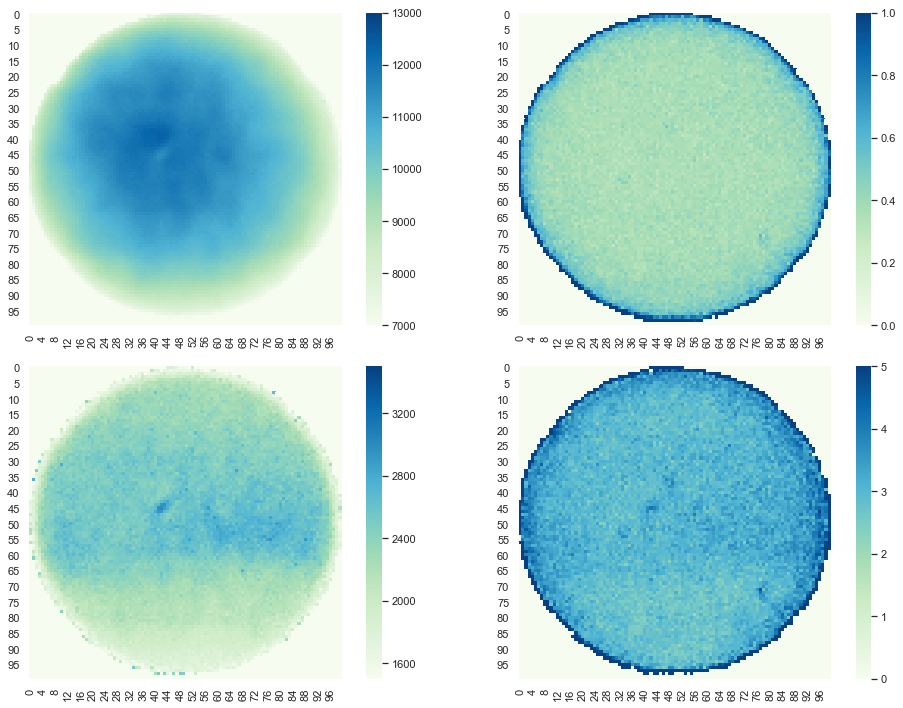

In [57]:
draw_xy_maps(amAV,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [60]:
amv = amap_average(amAV) 

In [80]:
amv

ASectorMap(chi2=1.6717262983712613, e0=9905.581146180128, lt=2309.5512077133435, e0u=0.4790052520849021, ltu=3.838173370670088)

### Next, NaNs are replaced by the average values of the variables (this is needed for the corrections). 

In [61]:
amAV0 = amap_replace_nan_by_mean(amAV, amMean=amv)

In [62]:
amap_average(amAV0) 

ASectorMap(chi2=1.6468829120135349, e0=10079.393314292412, lt=2304.908853416416, e0u=0.45719688870543906, ltu=3.5398219682290266)

In [63]:
amap_max(amAV0)

ASectorMap(chi2=53.966505974199514, e0=12375.648831701425, lt=3001.718671487905, e0u=3.5505678584494995, ltu=63.09465188067827)

In [64]:
amap_min(amAV0)

ASectorMap(chi2=0.34206872205314937, e0=6012.809937506124, lt=1389.1231513270748, e0u=0.2736406346219864, ltu=2.0614126830141988)

In [66]:
aMaps = []
for amap in amaps:
    amv = amap_average(amap) 
    aMaps.append(amap_replace_nan_by_mean(amap, amv))


### The maps can be saved to file

In [67]:
write_maps(amAV0, filename=fn.map_file_name)

### And retrieved from file

In [68]:
amap2 = read_maps(filename=fn.map_file_name)

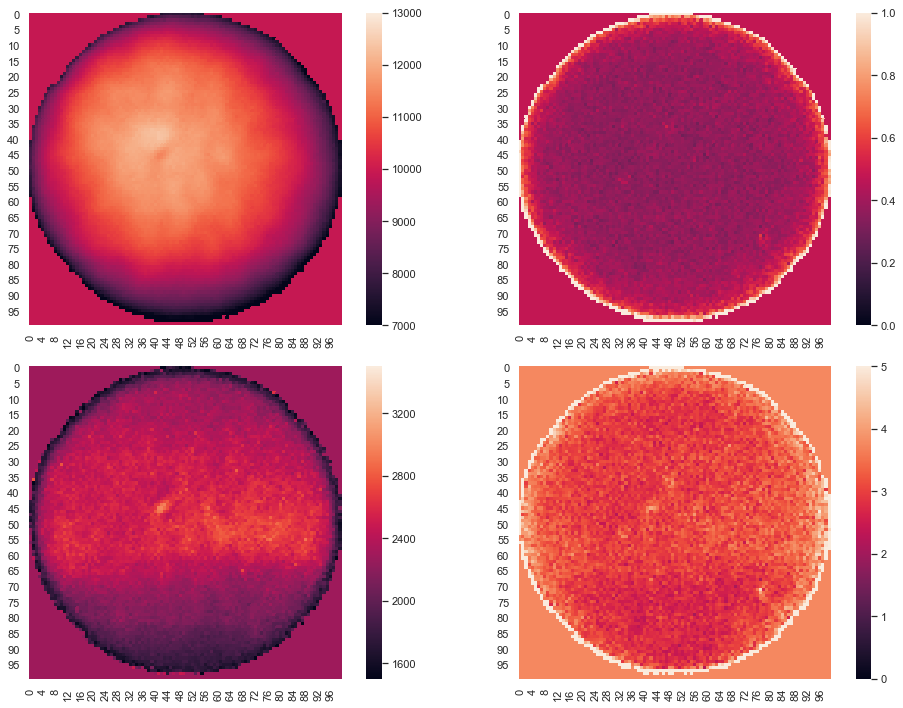

In [69]:
draw_xy_maps(amap2,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0, 1),
            lulims  = (0, 5),
            figsize=(14,10))

### To write the complete time-series of maps
```
write_maps_ts(aMaps : Iterable[ASectorMap], ts: np.array, filename : str)
```

In [70]:
write_maps_ts(aMaps, times, filename=fn.map_file_name_ts)

#### They can be read back

In [71]:
ts, tsMaps = read_maps_ts(fn.map_file_name_ts)

In [72]:
ts

0         0
1     50000
2    100000
3    150000
4    200000
dtype: int64

### One can plot the maps selected by type:

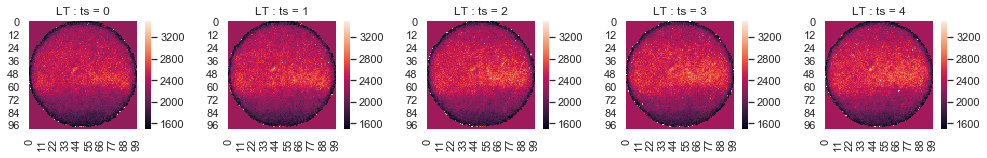

In [73]:
draw_xy_maps_ts(tsMaps,   
                wmap    = MapType.LT,
                ltlims  = (1500, 3500),
                figsize = (14,10))

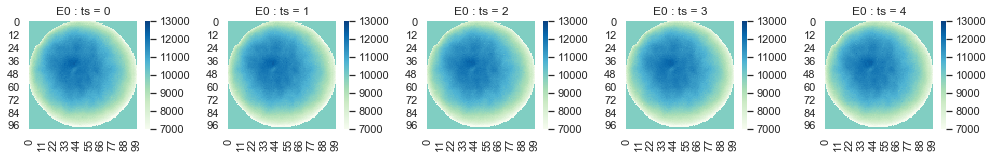

In [74]:
draw_xy_maps_ts(tsMaps,   
                wmap    = MapType.E0,
                ltlims  = (7000, 13000),
                cmap    = matplotlib.cm.GnBu, 
                figsize = (14,10))